#### Import the libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

#### Import the CIFAR datasets

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [6]:
print(f"The shape of training features (X_train): {X_train.shape}")
print(f"The shape of training labels (y_train): {y_train.shape}")
print(f"The shape of test features (X_test): {X_test.shape}")
print(f"The shape of test features (y_test): {y_test.shape}")

The shape of training features (X_train): (50000, 32, 32, 3)
The shape of training labels (y_train): (50000, 1)
The shape of test features (X_test): (10000, 32, 32, 3)
The shape of test features (y_test): (10000, 1)


#### Let's see what the data looks like

* It has 10 labels, we can see them from the website of CIFAR-10

In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Text(0.5, 0, 'frog')

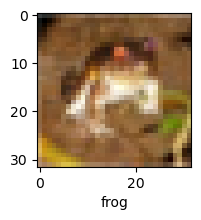

In [10]:
plt.figure(figsize=(15, 2))
plt.imshow(X_train[0])
plt.xlabel(classes[int(y_train[0])])

Text(0.5, 0, 'automobile')

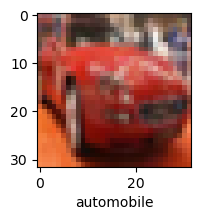

In [11]:
plt.figure(figsize=(15, 2))
plt.imshow(X_train[5])
plt.xlabel(classes[int(y_train[5])])

#### Now we can normalize the features data (X_train, X_test)

In [13]:
X_train = X_train/255
X_test = X_test/255

#### We can now create a CNN Model

In [29]:
cnn = Sequential()
cnn.add(Input(shape=(32, 32, 3)))

cnn.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(48, kernel_size=(3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

cnn.add(Flatten())
cnn.add(Dense(64, activation="relu"))
cnn.add(Dense(10, activation="softmax"))

cnn.compile(optimizer=Adam(learning_rate = 1e-3),
           loss="sparse_categorical_crossentropy",
           metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = cnn.fit(X_train, y_train, epochs=15, batch_size=40, validation_split=0.2, callbacks=[early_stopping])

cnn.evaluate(X_test, y_test)

Epoch 1/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 47s 45ms/step - accuracy: 0.2606 - loss: 1.9557 - val_accuracy: 0.4645 - val_loss: 1.5047
Epoch 2/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.4686 - loss: 1.4657 - val_accuracy: 0.5425 - val_loss: 1.2756
Epoch 3/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.5246 - loss: 1.3251 - val_accuracy: 0.5767 - val_loss: 1.2104
Epoch 4/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.5550 - loss: 1.2369 - val_accuracy: 0.6254 - val_loss: 1.0811
Epoch 5/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.5773 - loss: 1.1788 - val_accuracy: 0.6337 - val_loss: 1.0520
Epoch 6/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.5995 - loss: 1.1257 - val_accuracy: 0.6275 - val_loss: 1.0569
Epoch 7/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.6145 - loss: 1.0890 - val_accuracy: 0.6687 - val_loss: 0.9582
Epoch 8/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.6224 -

[0.8457845449447632, 0.7067999839782715]

### Now we see some predictions by the model, and check if it matches with the labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
No. of prediction:  1
Predicted figures:  cat


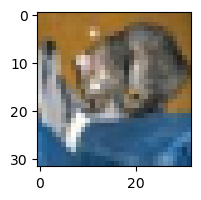

Targets :  cat


No. of prediction:  2
Predicted figures:  ship


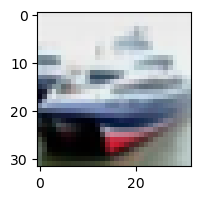

Targets :  ship


No. of prediction:  3
Predicted figures:  ship


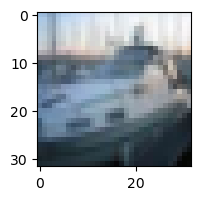

Targets :  ship


No. of prediction:  4
Predicted figures:  airplane


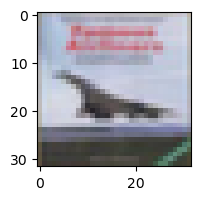

Targets :  airplane


No. of prediction:  5
Predicted figures:  frog


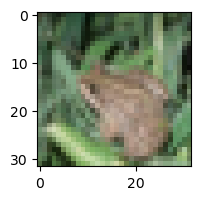

Targets :  frog


No. of prediction:  6
Predicted figures:  frog


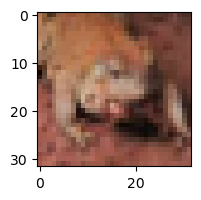

Targets :  frog


No. of prediction:  7
Predicted figures:  automobile


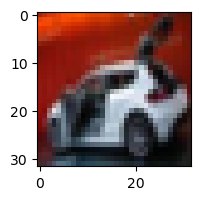

Targets :  automobile


No. of prediction:  8
Predicted figures:  frog


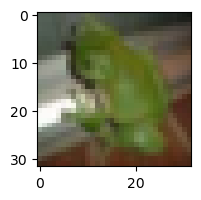

Targets :  frog


No. of prediction:  9
Predicted figures:  dog


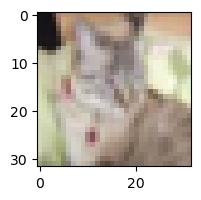

Targets :  cat


No. of prediction:  10
Predicted figures:  automobile


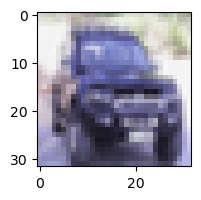

Targets :  automobile




In [31]:
predictions = cnn.predict(X_test)

for i in range(10):
    print("No. of prediction: ", i+1)
    print("Predicted figures: ", classes[int(np.argmax(predictions[i]))])
    plt.figure(figsize=(15,2))
    plt.imshow(X_test[i])
    plt.show()
    print("Targets : ", classes[int(y_test[i])])
    print("\n")

### Let's plot the performance of the model

* Plot training & validation accuracy values

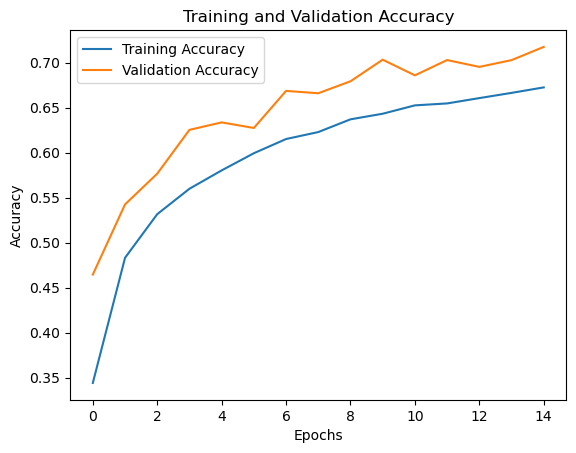

In [32]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

* Plot training & validation loss values

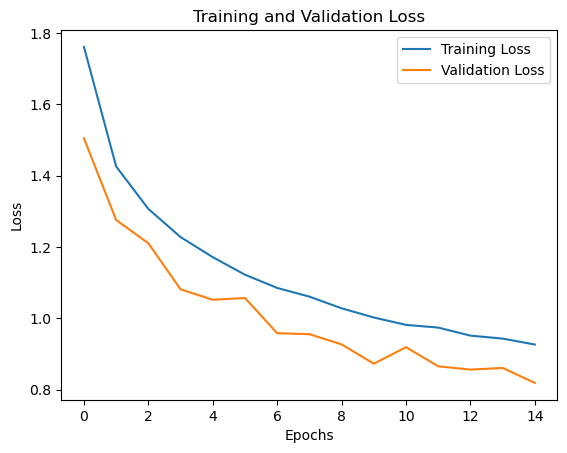

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()